In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import pickle

In [3]:
df=pd.read_csv("Train.csv")
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [4]:
df.sample(4)

,text,label
864,"Nicole Eggert was listed as the star of this, ...",0
206,I've read reviews that apparently you have to ...,0
27948,this movie is just great. if you have a chance...,1
8390,I disagree with much that has been written and...,0


In [5]:
df.columns

Index(['text', 'label'], dtype='object')

In [6]:
df.shape

(40000, 2)

In [7]:
df.size

80000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [9]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
df.duplicated().sum()

277

In [14]:
df=df.drop_duplicates()

In [15]:
df['label'].value_counts()
#balanced data

label
1    19908
0    19815
Name: count, dtype: int64

<Axes: xlabel='label'>

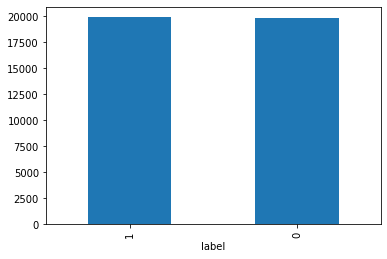

In [16]:
df['label'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

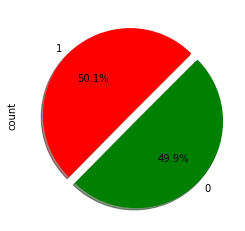

In [20]:
colors=['red','green']
df['label'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,colors=colors,startangle = 45,
                 explode=(0, 0.1))

In [21]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [22]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [24]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [25]:
df['text']

0        grew b 1965 watch love thunderbird mate school...
1        put movi dvd player sat coke chip expect hope ...
2        peopl know particular time past like feel need...
3        even though great interest biblic movi bore de...
4        im die hard dad armi fan noth ever chang got t...
                               ...                        
39995    western union someth forgotten classic western...
39996    movi incred piec work explor everi nook cranni...
39997    wife watch movi plan visit sicili stromboli so...
39998    first watch flatlin amaz necessari featur good...
39999    would film good gross estim 95 000 000 award n...
Name: text, Length: 39723, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [28]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.7min finished


In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8861645352935253


In [30]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [38]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('put movi dvd player sat coke chip expect hope movi would contain strong point first movi awsom anim good flow stori excel voic cast funni comedi kick ass soundtrack disappoint found atlanti milo return read review first might let follow paragraph direct seen first movi enjoy primarili point mention first scene appear shock pick atlanti milo return display case local videoshop whatev expect music feel bad imit first movi voic cast replac fit one except charact like voic sweet actual draw isnt bad anim particular sad sight storylin also pretti weak like three episod schoobi doo singl adventur stori got last time dont misunderstand good schoobi doo episod didnt laugh singl time although might snigger twice audienc seen first movi especi care similar sequel fast review movi stand alon product like schoobi doo might like movi could still enjoy movi noth els suspect might good kid movi know might better milo return three episod seri cartoon channel breakfast tv')
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

negative comment


In [42]:
df['text'][4]

'im die hard dad armi fan noth ever chang got tape dvd audiobook everi time watch listen brand new film film run certain episod man hour enemi within gate battl school numer other differ edg introduct new gener instead captain squar brilliant move especi cash chequ someth rare done follow earli year get equip uniform start train great film bore sunday afternoon two draw back one german bogu dodgi accent come one german cant pronounc letter w like us two cast liz frazer instead familiar janet davi like liz film like carri on carri correctli janet davi would better choic'

In [41]:
df

,text,label
0,grew b 1965 watch love thunderbird mate school...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl know particular time past like feel need...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1
...,...,...
39995,western union someth forgotten classic western...,1
39996,movi incred piec work explor everi nook cranni...,1
39997,wife watch movi plan visit sicili stromboli so...,0
39998,first watch flatlin amaz necessari featur good...,1
